In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,\
     recall_score, f1_score, roc_auc_score, roc_curve, \
    confusion_matrix, precision_recall_curve
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv(r'diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head()


0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [88]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [89]:
def get_clf_eval(y_test, pred, pred_proba):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('Confusion Matrix:\n', confusion, sep='')
    print('Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, f1_score: {:.4f},\
    AUC: {:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


In [90]:
target = diabetes_data['Outcome']
data = diabetes_data.drop('Outcome', axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.2)

LR_clf = LogisticRegression()
LR_clf.fit(X_train, Y_train)
pred = LR_clf.predict(X_test)
pred_proba = LR_clf.predict_proba(X_test)[:,1]

get_clf_eval(Y_test, pred, pred_proba)


Confusion Matrix:
[[93 10]
 [23 28]]
Accuracy: 0.7857, Precision: 0.7368, Recall: 0.5490, f1_score: 0.6292,    AUC: 0.8024


c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


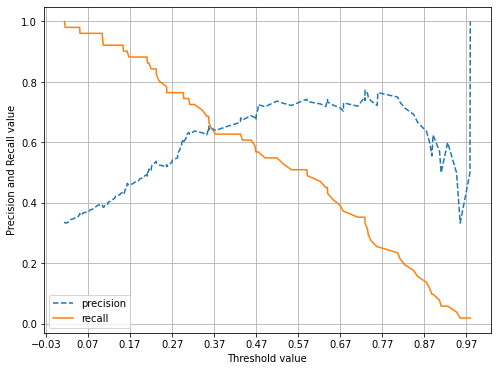

In [91]:
def precision_recall_curve_plot(Y_test, pred_proba):
    precisions, recalls, thresholds = precision_recall_curve(Y_test, pred_proba)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[:threshold_boundary], label='recall')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

precision_recall_curve_plot(Y_test, pred_proba)

In [92]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

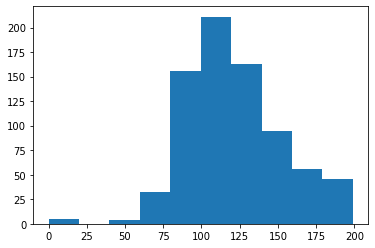

In [93]:
plt.hist(diabetes_data['Glucose'], bins=10)

In [94]:
feature_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

total_count = diabetes_data.iloc[:,0].count()

for feature in feature_check:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{} - # of zero values: {}, Precentage: {}%'.format(feature, zero_count, 100*zero_count/total_count))

Glucose - # of zero values: 5, Precentage: 0.6510416666666666%
BloodPressure - # of zero values: 35, Precentage: 4.557291666666667%
SkinThickness - # of zero values: 227, Precentage: 29.557291666666668%
Insulin - # of zero values: 374, Precentage: 48.697916666666664%
BMI - # of zero values: 11, Precentage: 1.4322916666666667%


In [95]:
mean_zero_features = diabetes_data[feature_check].mean()
diabetes_data[feature_check] = diabetes_data[feature_check].replace(0, mean_zero_features)

In [96]:
# for feature in feature_check:
#     feature_mean = diabetes_data[diabetes_data[feature] != 0][feature].mean()
#     diabetes_data[feature] = diabetes_data[feature].replace(0, feature_mean)

In [97]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [98]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

X_train, X_test, Y_train, Y_test = train_test_split(scaled_data, target, test_size=0.2)

LR_clf.fit(X_train, Y_train)
pred = LR_clf.predict(X_test)
pred_proba = LR_clf.predict_proba(X_test)[:,1]

get_clf_eval(Y_test, pred, pred_proba)

Confusion Matrix:
[[97  5]
 [18 34]]
Accuracy: 0.8506, Precision: 0.8718, Recall: 0.6538, f1_score: 0.7473,    AUC: 0.8761


In [102]:
pred_proba = LR_clf.predict_proba(X_test)
pred_proba_1 = pred_proba[:,1]

def get_clf_eval(y_test, pred, pred_proba_1):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba_1)
         
    return accuracy, precision, recall, f1, roc_auc

def get_eval_by_threshold(Y_test, pred, pred_proba, thresholds):
    dict = {}

    for thresh in thresholds:
        binarizer = Binarizer(threshold=thresh)
        binarizer.fit(pred_proba)
        new_pred = binarizer.transform(pred_proba)[:,1].reshape(-1,1)
        
        # print('Threshold:', thresh)
        acc_pre_re_f1_auc = get_clf_eval(Y_test, new_pred, pred_proba_1)
        dict[thresh] = acc_pre_re_f1_auc

    df = pd.DataFrame(dict)
    df.index = ['Accuracy', 'Precision', 'Recall', 'F1_Score', 'ROC-AUC']
    return df
    
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.51, 0.54, 0.57, 0.6]
get_eval_by_threshold(Y_test, pred, pred_proba, thresholds)

,0.30,0.33,0.36,0.39,0.42,0.45,0.48,0.51,0.54,0.57,0.60
Accuracy,0.766234,0.766234,0.792208,0.818182,0.818182,0.831169,0.844156,0.850649,0.850649,0.850649,0.863636
Precision,0.611111,0.621212,0.672414,0.740000,0.750000,0.809524,0.850000,0.871795,0.871795,0.871795,0.918919
Recall,0.846154,0.788462,0.750000,0.711538,0.692308,0.653846,0.653846,0.653846,0.653846,0.653846,0.653846
F1_Score,0.709677,0.694915,0.709091,0.725490,0.720000,0.723404,0.739130,0.747253,0.747253,0.747253,0.764045
ROC-AUC,0.876131,0.876131,0.876131,0.876131,0.876131,0.876131,0.876131,0.876131,0.876131,0.876131,0.876131
